In [3]:
%matplotlib inline


# Corner detection


Detect corner points using the Harris corner detector and determine the
subpixel position of corners ([1]_, [2]_).

.. [1] https://en.wikipedia.org/wiki/Corner_detection
.. [2] https://en.wikipedia.org/wiki/Interest_point_detection




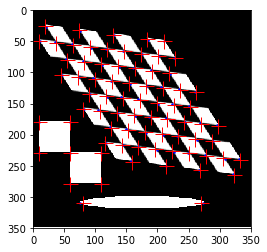

In [4]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))
rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 350, 350, 0))
plt.show()